In [693]:
#!pip install matplotlib
#!pip install numpy

In [694]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

In [695]:

# a1 = pd.read_csv("./data/2015.csv", sep=";")
# a2 = pd.read_csv("./data/2016.csv", sep=";")

# fpour lire les fichiers de 2015 à 2020
# et les concaténer dans un seul dataframe
from operator import ne


for i in range(2015, 2021):
    if i == 2015:
        df = pd.read_csv(f"./data/{i}.csv", sep=";")
    else:
        df = pd.concat([df, pd.read_csv(f"./data/{i}.csv", sep=";")])
new_df = df.loc[:, ['Année', 'Lieu Admin Actuel - Territoire Nom', 'Type Accident - Libellé', 'Catégorie véhicule', 'Age véhicule']]
# new_df.tail(3)
# fusionner les lignes Moto lourde, légère et Cyclo  dans moto, 
# et les lignes indeterminable et non renseigné dans autre
new_df['Catégorie véhicule'] = new_df['Catégorie véhicule'].replace({'Moto lourde': 'Moto', 'Moto légère': 'Moto', 'Cyclo': 'Moto', 'Indéterminable': 'Autres'})
# new_df['Catégorie véhicule'] = new_df['Catégorie véhicule'].replace('Moto légère', 'Moto')
# new_df['Catégorie véhicule'] = new_df['Catégorie véhicule'].replace('Cyclo', 'Moto')
new_df


,Année,Lieu Admin Actuel - Territoire Nom,Type Accident - Libellé,Catégorie véhicule,Age véhicule
0,2015,DOM,Accident grave non mortel,PL,2.0
1,2015,DOM,Accident grave non mortel,Moto,0.0
2,2015,DOM,Accident Léger,VT,13.0
3,2015,DOM,Accident Léger,VT,7.0
4,2015,DOM,Accident grave non mortel,VT,4.0
...,...,...,...,...,...
74659,2020,Métropole,Accident grave non mortel,VT,13.0
74660,2020,Métropole,Accident grave non mortel,VT,13.0
74661,2020,Métropole,Accident Léger,VT,15.0
74662,2020,Métropole,Accident grave non mortel,Moto,5.0


In [696]:
# df.info()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557347 entries, 0 to 74663
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Année                               557347 non-null  int64  
 1   Lieu Admin Actuel - Territoire Nom  557347 non-null  object 
 2   Type Accident - Libellé             557347 non-null  object 
 3   Catégorie véhicule                  557347 non-null  object 
 4   Age véhicule                        515516 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.5+ MB


In [697]:
# obtenir le nombre d'accidents par age de la voiture en utilisant le groupby et le sort_values
accident_par_age_vehicule = (new_df.groupby('Age véhicule')['Age véhicule'].count()).reset_index(name='nombre').sort_values(['nombre'], ascending=False)

# new_df.groupby('Age véhicule').size()
top10_accident_par_age_vehicule = accident_par_age_vehicule.head(10)

Nombre d'accident par âge du véhicule de 2015 à 2020

<AxesSubplot: title={'center': "Nombre d'accidents par âge du véhicule de 2015 à 2020"}, xlabel='Age véhicule'>

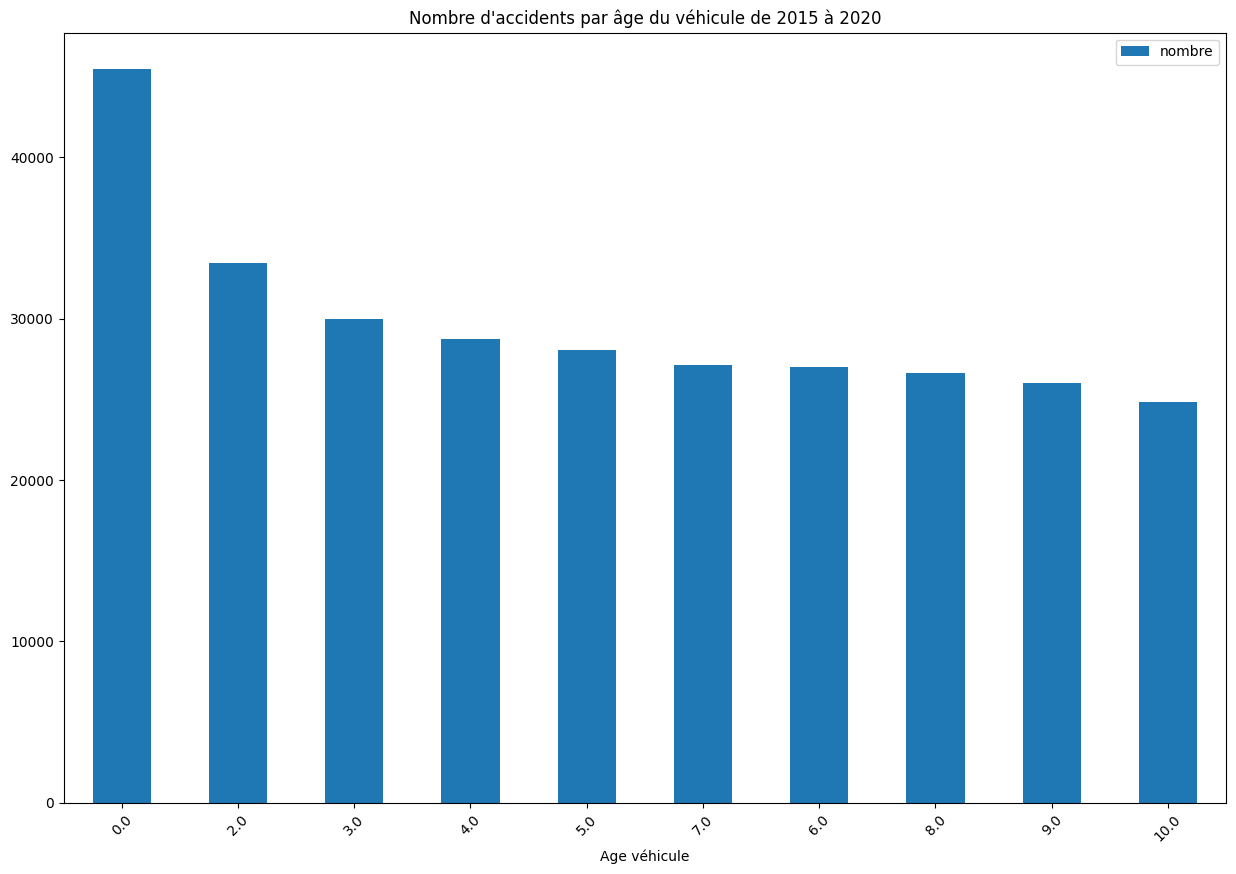

In [698]:
# faire un graphique en barre pour toutes les voitures
# top10_accident_par_age_vehicule.plot.bar(x='Age véhicule', y='nombre', rot=45, title='Nombre d\'accidents par âge du véhicule de 2015 à 2020')
top10_accident_par_age_vehicule.plot.bar(x='Age véhicule', y='nombre', rot=45, title='Nombre d\'accidents par âge du véhicule de 2015 à 2020')
# accident_par_age_vehicule_par_annee.plot.bar(x='Année', y='Age véhicule', rot=45, title='Nombre d\'accidents par âge du véhicule de 2015 à 2020')

In [699]:
# accident par age du véhicule par année
accident_par_age_vehicule_par_annee = new_df.groupby(['Année', 'Age véhicule']).size().reset_index(name="Nombre d'accident").sort_values(["Age véhicule"], ascending=True)
accident_par_age_vehicule_par_annee
# accident par age du véhicule par année en utilisant matplotlib et numpy
# plt.barh(accident_par_age_vehicule_par_annee['Année'], accident_par_age_vehicule_par_annee["Nombre d'accident"])
# plt.show()



,Année,Age véhicule,Nombre d'accident
0,2015,0.0,7550
140,2017,0.0,8005
206,2018,0.0,7743
352,2020,0.0,6327
272,2019,0.0,8549
...,...,...,...
348,2019,92.0,1
349,2019,93.0,1
350,2019,99.0,3
351,2019,100.0,3


Accident par age du véhicule par année de 2015 à 2020

In [700]:
data_0_3 = accident_par_age_vehicule_par_annee[accident_par_age_vehicule_par_annee['Age véhicule'] <= 3]
data_4_10 = accident_par_age_vehicule_par_annee[(accident_par_age_vehicule_par_annee['Age véhicule'] > 3) & (accident_par_age_vehicule_par_annee['Age véhicule'] <= 10)]
data_11_20 = accident_par_age_vehicule_par_annee[(accident_par_age_vehicule_par_annee['Age véhicule'] > 10) & (accident_par_age_vehicule_par_annee['Age véhicule'] <= 20)]

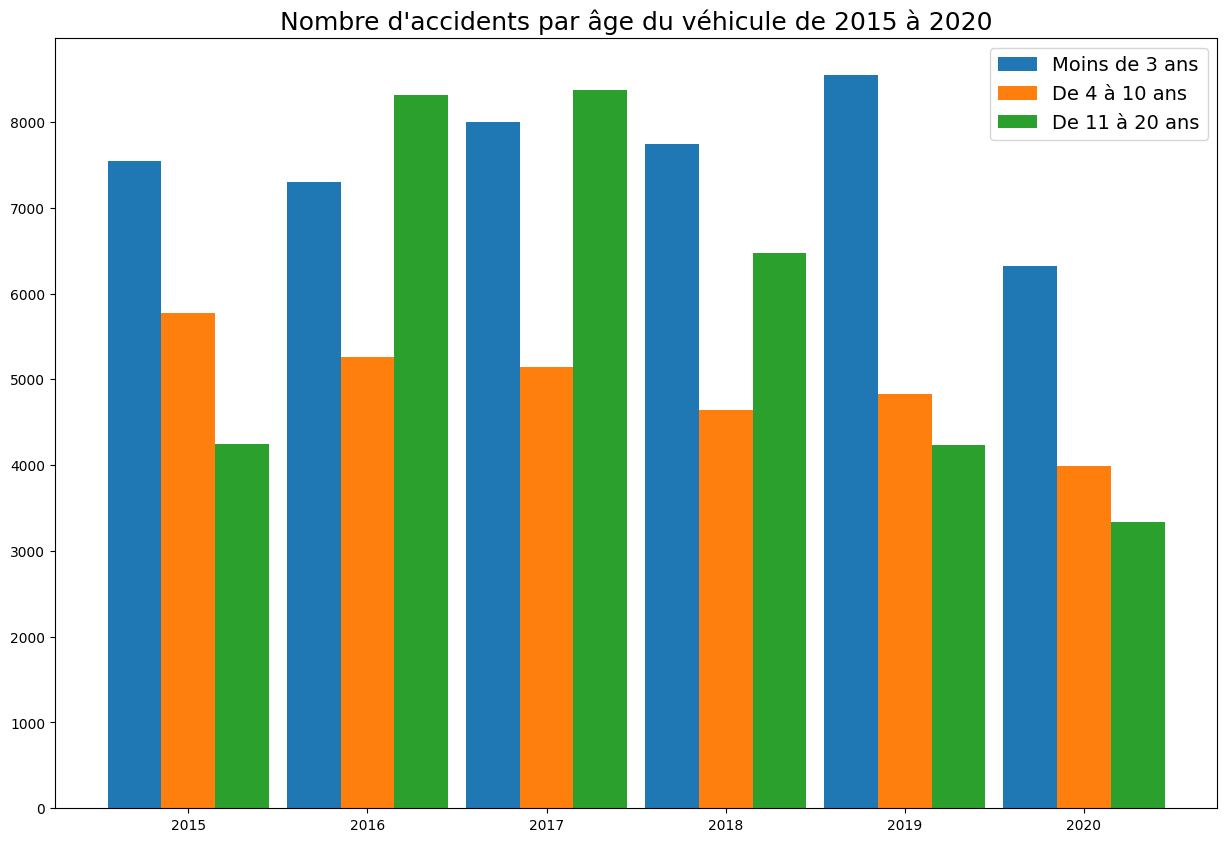

In [706]:
# Accident par age du véhicule par année en utilisant matplotlib
# for i in accident_par_age_vehicule_par_annee['Age véhicule'].unique():
#     df = accident_par_age_vehicule_par_annee[accident_par_age_vehicule_par_annee['Age véhicule'] == i]
#     plt.bar(df['Année'], df['Nombre d\'accident'], label=i)
#     plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=18)

barWidth = 0.3
# creation de la bar Data_0_3
plt.bar(data_0_3['Année']-0.3, data_0_3['Nombre d\'accident'], label='Moins de 3 ans', width=barWidth)
# afficher les valeur des barres sur le graphique pour data_0_3

# creation de la bar Data_4_10
plt.bar(data_4_10['Année'], data_4_10['Nombre d\'accident'], label='De 4 à 10 ans', width=barWidth)
# creation de la bar Data_11_20
plt.bar(data_11_20['Année']+0.3, data_11_20['Nombre d\'accident'], label='De 11 à 20 ans', width=barWidth)

plt.title('Nombre d\'accidents par âge du véhicule de 2015 à 2020', fontsize=18)

# ppour chaque bar on affiche le nombre d'accident

plt.legend(fontsize=14)
plt.show()


Accident par type de véhicule de 2015 à 2020

In [ ]:
new_df
# new_df['Catégorie véhicule'] = new_df['Age '].replace({'Moto lourde': 'Moto', 'Moto légère': 'Moto', 'Cyclo': 'Moto', 'Indéterminable': 'Autres'})
# obtenir les accidents par type de véhicule
# accident_par_type_vehicule = (new_df.groupby('Catégorie véhicule')['Catégorie véhicule'].count()).reset_index(name='nombre').sort_values(['nombre'], ascending=False)
# accident_par_type_vehicule

# obtenir les accidents par type de véhicule par année
accident_par_type_vehicule_par_annee = (new_df.groupby(['Année', 'Catégorie véhicule'])['Catégorie véhicule'].count()).reset_index(name="Nombre d'accident").sort_values(['Année'], ascending=False)

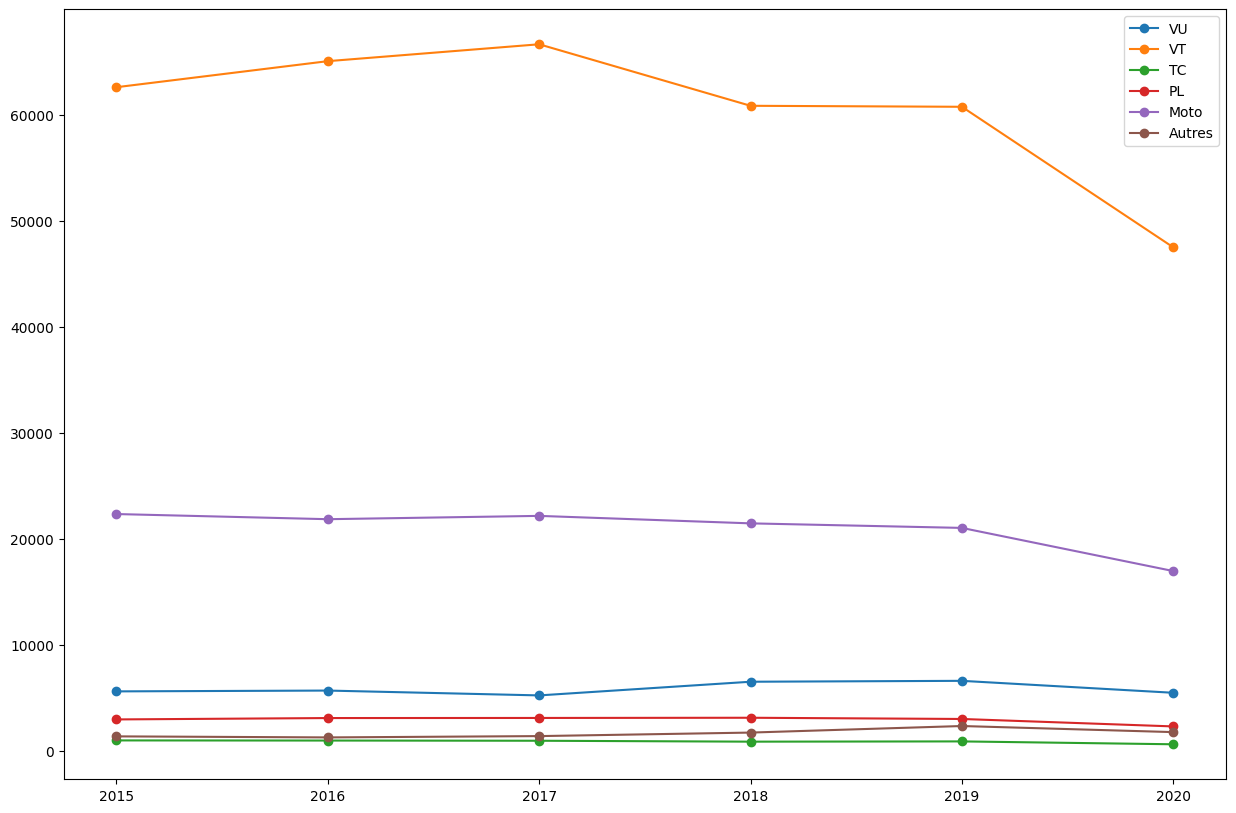

In [ ]:
# faire un graphique en ligne pour les accidents par type de véhicule par année
# faire une ligne pour chaque type de véhicule
for i in accident_par_type_vehicule_par_annee['Catégorie véhicule'].unique():
    df = accident_par_type_vehicule_par_annee[accident_par_type_vehicule_par_annee['Catégorie véhicule'] == i]
    plt.plot(df['Année'], df["Nombre d'accident"], label=i, marker='o')
    plt.legend()
    # print(i)

Accident par térritoire

In [ ]:
accident_par_territoire_par_annee = (new_df.groupby(['Année', 'Lieu Admin Actuel - Territoire Nom'])['Lieu Admin Actuel - Territoire Nom'].count()).reset_index(name="Nombre d'accident").sort_values(['Année'], ascending=False)
accident_par_territoire_par_annee

,Année,Lieu Admin Actuel - Territoire Nom,Nombre d'accident
17,2020,Métropole,70428
16,2020,DOM,3471
15,2020,Autres OM,765
14,2019,Métropole,90129
13,2019,DOM,3721
12,2019,Autres OM,824
10,2018,DOM,3277
11,2018,Métropole,90411
9,2018,Autres OM,896
8,2017,Métropole,95254


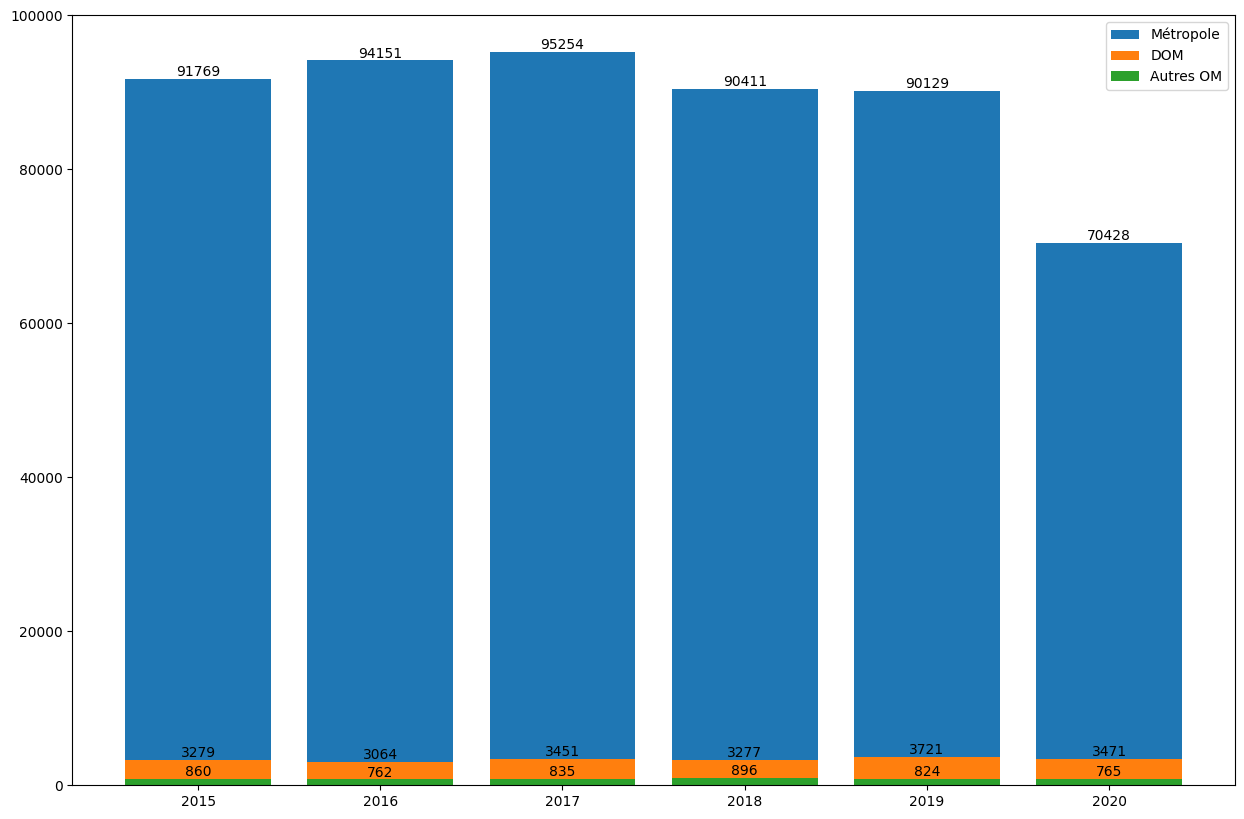

In [ ]:
#  Graphe en cammenbert pour les accidents par térritoire par année
# accident_par_territoire = (new_df.groupby('Lieu Admin Actuel - Territoire Nom')['Lieu Admin Actuel - Territoire Nom'].count()).reset_index(name='nombre').sort_values(['nombre'], ascending=False)
# accident_par_territoire


# utiliser matplotlib pour faire un graph en barre pour les accidents par térritoire par année
for i in accident_par_territoire_par_annee['Lieu Admin Actuel - Territoire Nom'].unique():
    df = accident_par_territoire_par_annee[accident_par_territoire_par_annee['Lieu Admin Actuel - Territoire Nom'] == i]
    # ajouter la valeur de l'axe y sur le graph
    for index, row in df.iterrows():
        plt.text(row['Année'], row['Nombre d\'accident'], row['Nombre d\'accident'], color='black', ha="center", va="bottom")
    plt.bar(df['Année'], df['Nombre d\'accident'], label=i)
    plt.legend()

Accident par type d'accident

In [ ]:
# Les accidents par type d'accident par année
accident_par_type_accident_par_annee = (new_df.groupby(['Année', 'Type Accident - Libellé'])['Type Accident - Libellé'].count()).reset_index(name='nombre').sort_values(['Année'], ascending=False)
accident_par_type_accident_par_annee

,Année,Type Accident - Libellé,nombre
17,2020,Accident mortel,3721
16,2020,Accident grave non mortel,21618
15,2020,Accident Léger,49325
14,2019,Accident mortel,4807
13,2019,Accident grave non mortel,26959
12,2019,Accident Léger,62908
10,2018,Accident grave non mortel,29682
11,2018,Accident mortel,4917
9,2018,Accident Léger,59985
8,2017,Accident mortel,5135


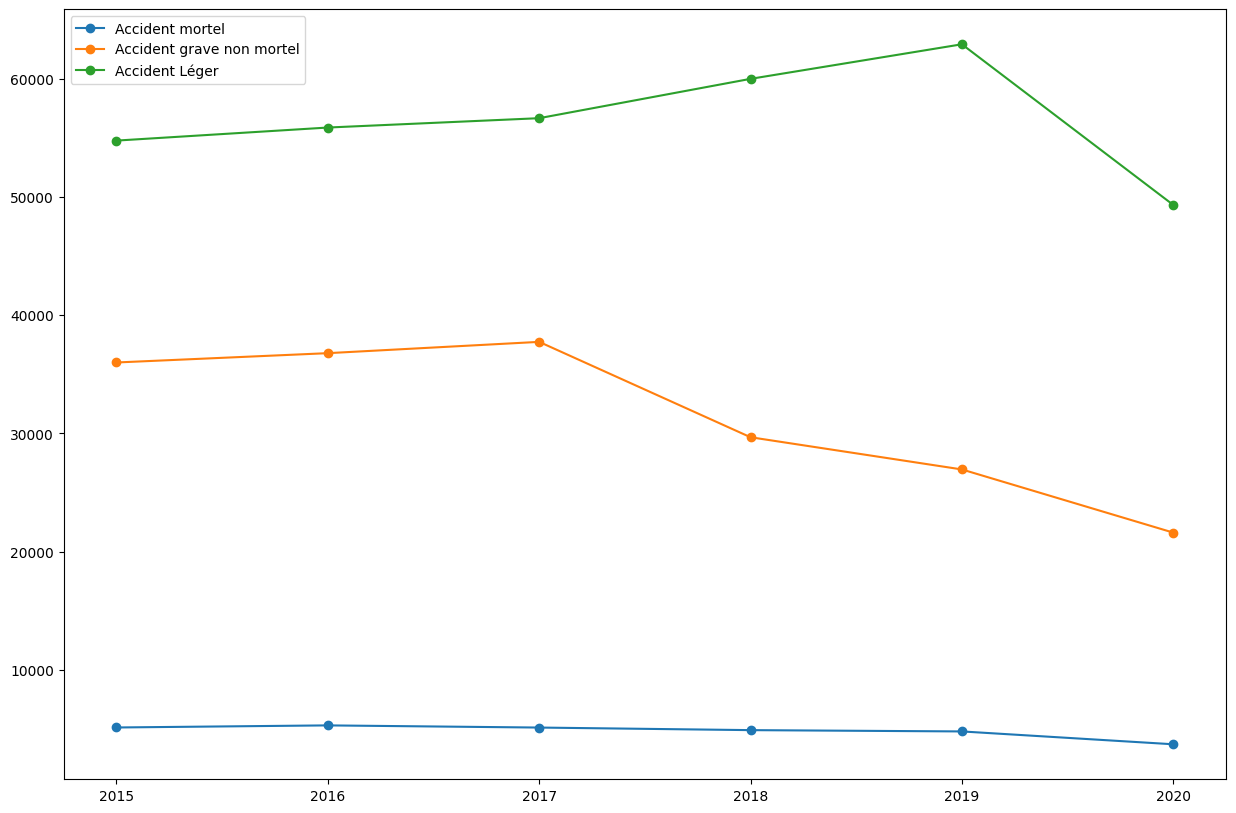

In [ ]:
# faire un graphique en ligne pour les accidents par type d'accident par année
# faire une ligne pour chaque type d'accident
for i in accident_par_type_accident_par_annee['Type Accident - Libellé'].unique():
    df = accident_par_type_accident_par_annee[accident_par_type_accident_par_annee['Type Accident - Libellé'] == i]
    plt.plot(df['Année'], df['nombre'], label=i, marker='o')
    plt.legend()
    # print(i)